In [0]:
#da Iris estraiamo mean, sd e ricreiamo un dataset fittizio misurandone l'accuratezza
X = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [0]:
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [0]:
y = X.pop('species')
y = pd.DataFrame(y)
columns = X.columns

In [0]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(119, 4) (30, 4) (119, 1) (30, 1)


In [0]:
#misuriamo l'accuratezza del dataset reale
#Gaussian Naive Bayes
import numpy as np
from sklearn.naive_bayes import GaussianNB

#training the AI
clf = GaussianNB()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#we create the list of sd
from math import *
var = list(clf.sigma_) #variance
var_list = list()

for i in range(len(var)):
  for j in range(0, 4):
    var_list.append(var[i][j])

for i in range(len(var_list)):
  var_list[i] = sqrt(var_list[i])
sd = var_list

#we create the list of mean
mean = clf.theta_ #mean
mean_list = list()
for i in range(len(mean)):
  for j in range(0, 4):
    mean_list.append(mean[i][j])
mean = mean_list

#we create the list of alpha
alpha = [0]*12

#we merge them all togethere to fit the pattern: [mean, sd, alpha]
features = [[0 for x in range(3)] for x in range(12)]
for r in range(len(sd)):
  features[r][0] = mean[r]
  features[r][1] = sd[r]
  features[r][2] = alpha[r]

In [0]:
features

[[5.0175, 0.33607105376489926, 0],
 [3.432500000000001, 0.39584561785960176, 0],
 [1.4774999999999996, 0.17390731203330645, 0],
 [0.2399999999999999, 0.099498759683977, 0],
 [5.9526315789473685, 0.5003876645292117, 0],
 [2.7263157894736842, 0.31007996979196273, 0],
 [4.2289473684210535, 0.45474567836045904, 0],
 [1.3052631578947371, 0.1834571145361789, 0],
 [6.636585365853658, 0.6565824689818087, 0],
 [3.0, 0.33129458302185594, 0],
 [5.597560975609757, 0.5849693806430326, 0],
 [2.0487804878048776, 0.2733013683095554, 0]]

In [0]:
labels = list(y['species'].unique())
names = [[X.columns[x]+' '+labels[m]] for m in range(len(labels)) for x in range(len(X.columns))]

In [0]:
names

[['sepal_length Iris-setosa'],
 ['sepal_width Iris-setosa'],
 ['petal_length Iris-setosa'],
 ['petal_width Iris-setosa'],
 ['sepal_length Iris-versicolor'],
 ['sepal_width Iris-versicolor'],
 ['petal_length Iris-versicolor'],
 ['petal_width Iris-versicolor'],
 ['sepal_length Iris-virginica'],
 ['sepal_width Iris-virginica'],
 ['petal_length Iris-virginica'],
 ['petal_width Iris-virginica']]

In [0]:
#generiamo le distribuzioni partendo dai dati
X2, y2, all_norm_copy = algo(features, labels, 1000000) #features devono essere sotto forma di sd, mean, alpha

In [0]:
#entire dataset
X2.reset_index(drop=True, inplace=True)
X2.columns = columns
y2.reset_index(drop=True, inplace=True)
y2.columns = ['species']
a = pd.concat([X2, y2], axis=1) #se non resettiamo gli index da errore
a.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.441639,3.162089,1.248066,0.162619,Iris-setosa
1,4.794150,2.926283,1.163067,0.200445,Iris-setosa
2,4.980443,3.654110,1.719066,0.188494,Iris-setosa
3,4.900419,2.793317,1.396354,0.219312,Iris-setosa
4,4.746637,3.337939,1.356126,0.045387,Iris-setosa


In [0]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(2400000, 4) (600000, 4) (2400000, 1) (600000, 1)


In [0]:
#misuriamo accuratezza delle nostre approssimazioni
#Gaussian Naive Bayes
import numpy as np
from sklearn.naive_bayes import GaussianNB

#training the AI
clf = GaussianNB()
clf.fit(X2, y2)
print(clf.score(X, y))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9530201342281879


In [0]:
a.pop('species')
a.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.154630,3.385617,1.782467,0.352153
1,4.779764,2.726238,1.380548,0.355968
2,5.284047,3.794925,1.731803,0.222145
3,5.159373,3.428795,1.401698,0.338597
4,4.947093,3.123861,1.411329,0.164715


##Distributions by Labels

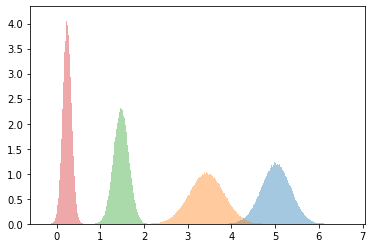

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

for n in range(0, 4):
  sns.distplot(distributions_combined[names[n]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
#plt.legend(prop={'size': 16}, title = 'Iris')
#plt.title('')
#plt.xlabel('')
#plt.ylabel('')
#density_airlines.py hosted with ❤ by GitHub

4
5
6
7


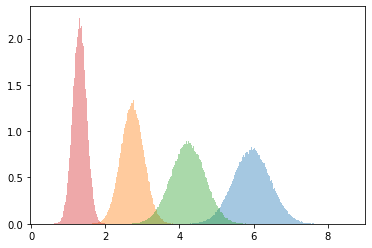

In [0]:
for n in range(4, 8):
  sns.distplot(distributions_combined[names[n]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})

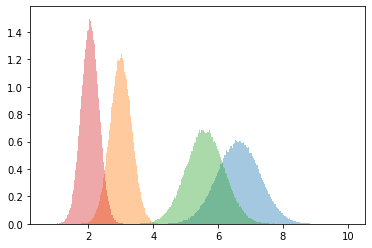

In [0]:
for n in range(8, 12):
  sns.distplot(distributions_combined[names[n]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})

##Distributions by Features

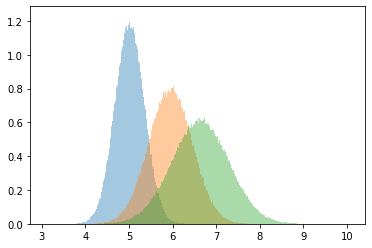

In [0]:
sns.distplot(distributions_combined[names[0]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[4]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[8]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
plt.figsize = (20, 20)

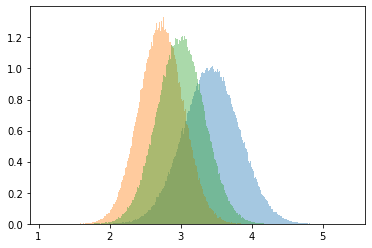

In [0]:
sns.distplot(distributions_combined[names[1]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[5]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[9]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})     

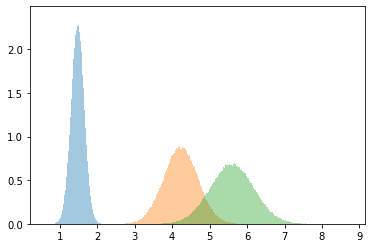

In [0]:
sns.distplot(distributions_combined[names[2]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[6]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[10]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})  

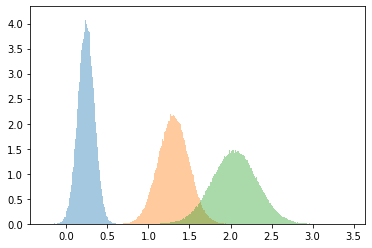

In [0]:
sns.distplot(distributions_combined[names[3]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[7]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})
sns.distplot(distributions_combined[names[11]], hist = True, bins = 1000, kde = True, kde_kws = {'linewidth': 0})  